<a href="https://colab.research.google.com/github/tammysilva/UCR_Course_Projects/blob/main/PHY243_MidTermProject_Jiaxin_Tang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0 Summary
###I chose Wine Quality Data Set for this midterm project. There are 1599 instances and 12 features in this data set. Fortunately, there is no missing data. What I did has included the following contents.
###1. Load pakages and load data
###2. Data exploration and visualization
###3. Feature preprocessing and engineering
###4. Data split and scaling
###5. Model training and evaluation
###6. Feature importance discussion

#1 Load packages, load data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1e-dzFvxDEa49EU-3RNJ_bpjqI-fQnWCI"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('winequality-red.csv')

#2 Data exploration and visualization

In [ ]:
wine_df = pd.read_csv('winequality-red.csv', sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
wine_df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
10%,6.500000,0.310000,0.010000,1.700000,0.060000,5.000000,14.000000,0.994556,3.120000,0.500000,9.300000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
95%,11.800000,0.840000,0.600000,5.100000,0.126100,35.000000,112.100000,1.000000,3.570000,0.930000,12.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


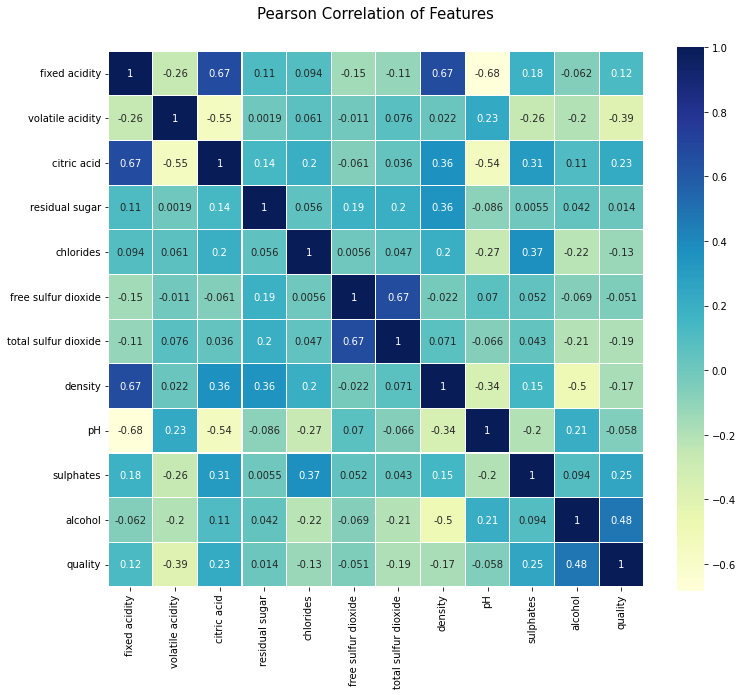

In [ ]:
corr = wine_df[['fixed acidity','volatile acidity','citric acid','residual sugar',
               'chlorides','free sulfur dioxide','total sulfur dioxide','density', 
               'pH', 'sulphates', 'alcohol','quality']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap="YlGnBu",annot=True)

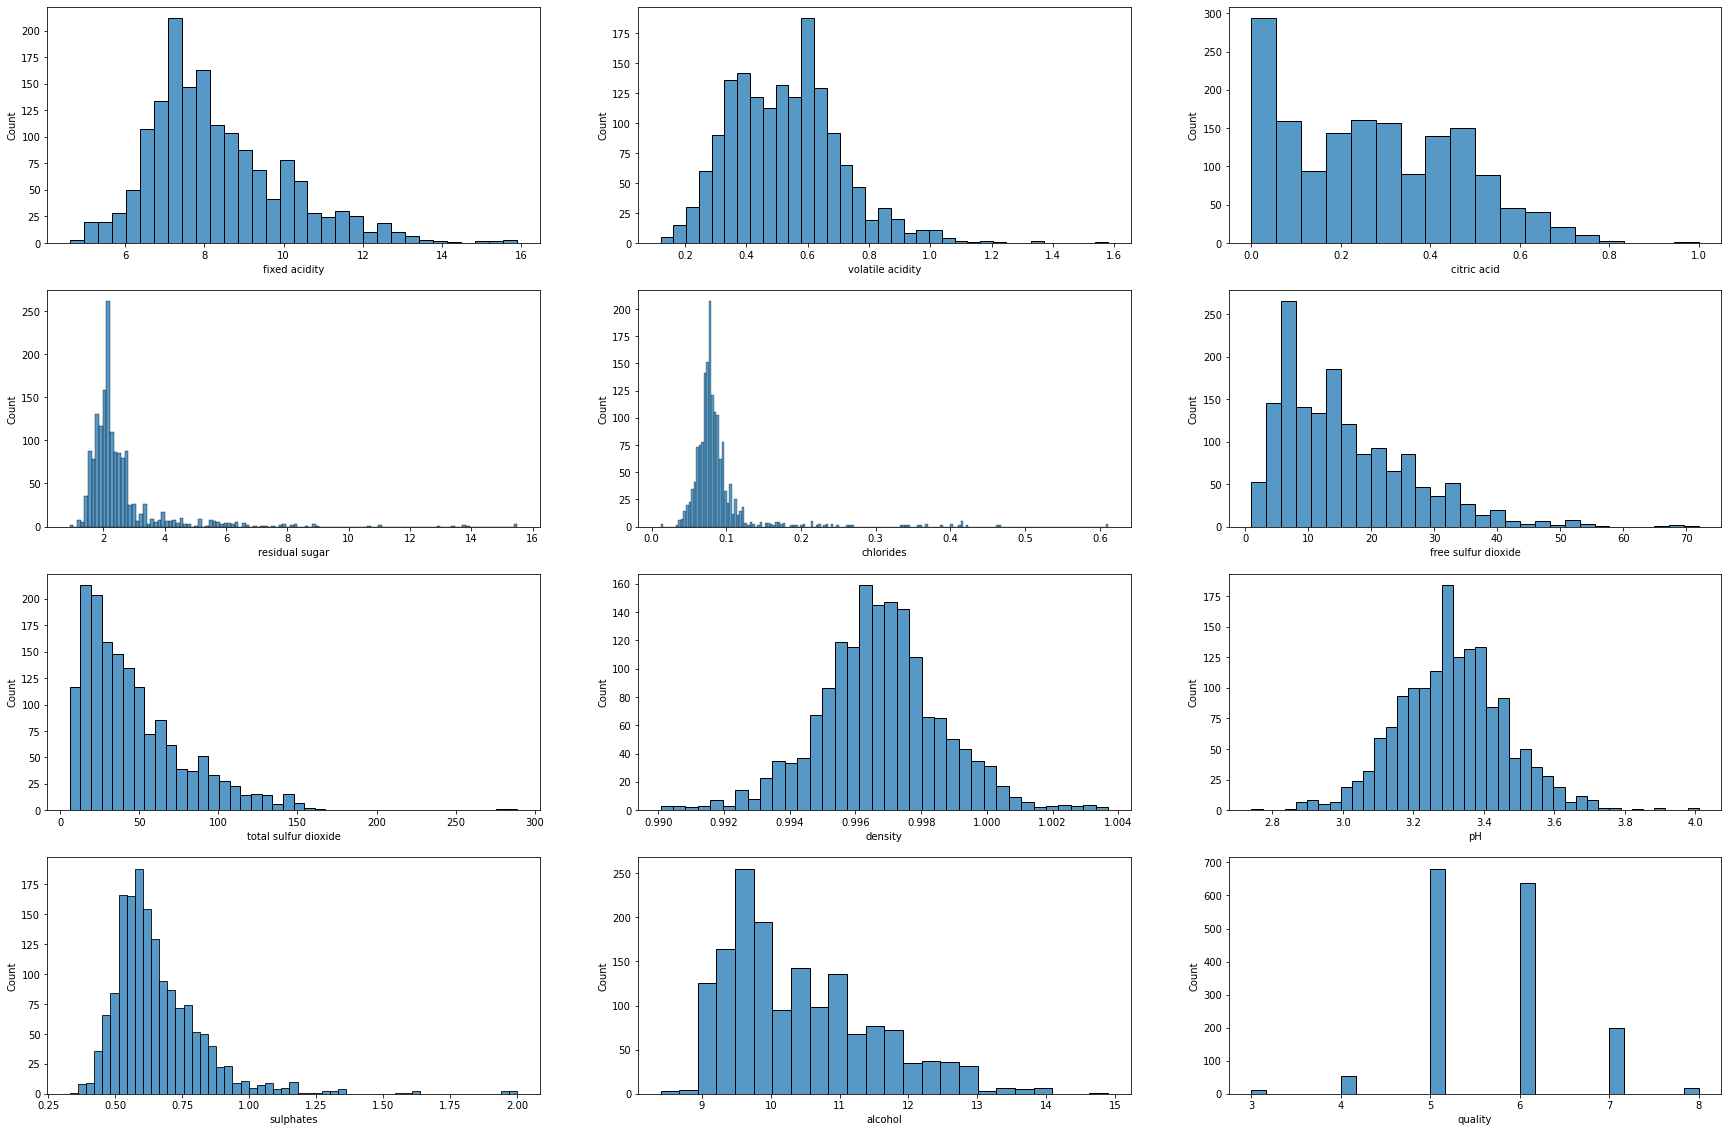

In [ ]:
_,axss = plt.subplots(4,3, figsize=[30,20])
sns.histplot(x ='fixed acidity', data=wine_df, ax=axss[0][0])
sns.histplot(x ='volatile acidity', data=wine_df, ax=axss[0][1])
sns.histplot(x ='citric acid', data=wine_df, ax=axss[0][2])
sns.histplot(x ='residual sugar', data=wine_df, ax=axss[1][0])
sns.histplot(x ='chlorides', data=wine_df, ax=axss[1][1])
sns.histplot(x ='free sulfur dioxide', data=wine_df, ax=axss[1][2])
sns.histplot(x ='total sulfur dioxide', data=wine_df, ax=axss[2][0])
sns.histplot(x ='density', data=wine_df, ax=axss[2][1])
sns.histplot(x ='pH', data=wine_df, ax=axss[2][2])
sns.histplot(x ='sulphates', data=wine_df, ax=axss[3][0])
sns.histplot(x ='alcohol', data=wine_df, ax=axss[3][1])
sns.histplot(x ='quality', data=wine_df, ax=axss[3][2])

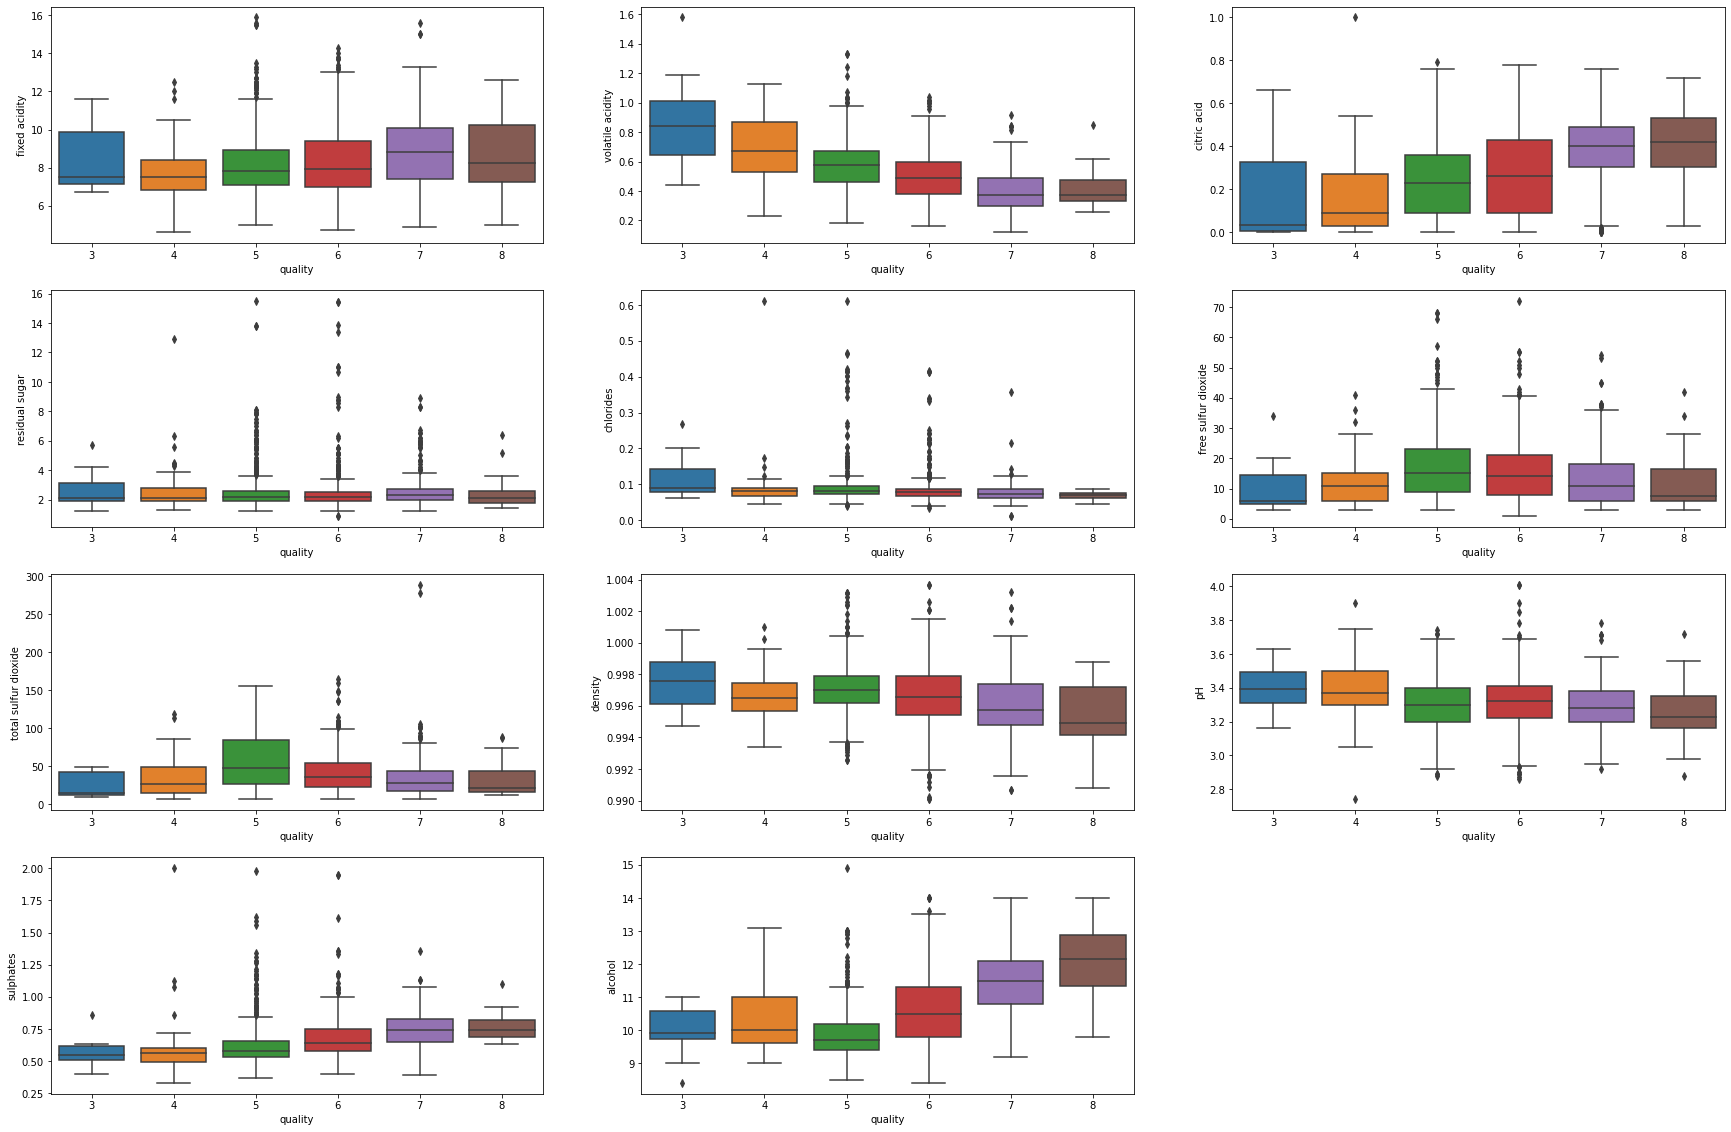

In [ ]:
_,axss = plt.subplots(4,3, figsize=[30,20])
sns.boxplot(x='quality', y ='fixed acidity', data=wine_df, ax=axss[0][0])
sns.boxplot(x='quality', y ='volatile acidity', data=wine_df, ax=axss[0][1])
sns.boxplot(x='quality', y ='citric acid', data=wine_df, ax=axss[0][2])
sns.boxplot(x='quality', y ='residual sugar', data=wine_df, ax=axss[1][0])
sns.boxplot(x='quality', y ='chlorides', data=wine_df, ax=axss[1][1])
sns.boxplot(x='quality', y ='free sulfur dioxide', data=wine_df, ax=axss[1][2])
sns.boxplot(x='quality', y ='total sulfur dioxide', data=wine_df, ax=axss[2][0])
sns.boxplot(x='quality', y ='density', data=wine_df, ax=axss[2][1])
sns.boxplot(x='quality', y ='pH', data=wine_df, ax=axss[2][2])
sns.boxplot(x='quality', y ='sulphates', data=wine_df, ax=axss[3][0])
sns.boxplot(x='quality', y ='alcohol', data=wine_df, ax=axss[3][1])
axss[3,2].set_axis_off()

#3 Feature preprocessing and engineering

In [ ]:
X = wine_df.drop(['quality'], axis = 1)
y = wine_df['quality']

In [ ]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,-0.006132,-0.023899,0.953136,-0.265092,0.098148,-0.079312,0.011142,-0.064907,-0.016206,0.011189,-0.000942
volatile acidity,0.000384,-0.002010,-0.025132,0.007274,-0.041157,-0.689242,0.464366,0.338841,0.428632,-0.091587,-0.000719
citric acid,0.000171,-0.003035,0.073708,-0.009832,0.041482,0.504044,-0.205508,0.327123,0.760466,-0.105489,-0.000058
residual sugar,0.008649,0.011135,0.280914,0.943178,-0.176627,0.005766,0.002495,-0.004134,-0.006931,-0.001486,-0.000413
chlorides,0.000064,-0.000237,0.002946,-0.000645,-0.009480,0.057016,0.113948,0.132518,0.072197,0.980249,-0.001819
free sulfur dioxide,0.218857,0.975266,0.020897,-0.021189,-0.007868,-0.001060,-0.000093,0.002574,0.001499,-0.000318,0.000009
total sulfur dioxide,0.975678,-0.218917,-0.001527,-0.003980,0.010323,-0.000614,-0.000230,-0.001212,-0.000657,0.000260,-0.000003
density,0.000004,-0.000025,0.000776,0.000055,-0.000834,-0.000467,0.001600,-0.004108,0.002839,0.002033,0.999983
pH,-0.000268,0.003272,-0.058631,0.020578,0.012622,-0.142002,-0.010261,-0.859197,0.478788,0.090645,-0.005068
sulphates,0.000223,0.000619,0.017525,-0.007199,0.023585,0.488427,0.853721,-0.132919,-0.053568,-0.105567,-0.001311


In [ ]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC5     0.186186
PC1     0.147331
PC4     0.124003
PC6     0.117735
PC2     0.116586
PC11    0.099229
PC8     0.098971
PC7     0.095775
PC9     0.090379
PC3     0.088774
PC10    0.061010
Name: MI Scores, dtype: float64

In [ ]:
# New features
X["Feature 1"] = X['alcohol'] * X['residual sugar']
X["Feature 2"] = X['free sulfur dioxide'] / X['total sulfur dioxide'] 
X["Feature 3"] = X['fixed acidity'] * X['residual sugar']
X["Feature 4"] = 1/2 * (X['fixed acidity'] + X['volatile acidity'])

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Feature 1,Feature 2,Feature 3,Feature 4
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,17.86,0.323529,14.06,4.05
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,25.48,0.373134,20.28,4.34
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,22.54,0.277778,17.94,4.28
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,18.62,0.283333,21.28,5.74
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,17.86,0.323529,14.06,4.05


#4 Data split and scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=3) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1279 observation with 15 features
test data has 320 observation with 15 features


In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Feature 1,Feature 2,Feature 3,Feature 4
1026,7.9,0.310,0.32,1.90,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,23.94,0.388889,15.010,4.1050
810,7.3,0.490,0.10,2.60,0.068,4.0,14.0,0.99562,3.30,0.47,10.5,27.30,0.285714,18.980,3.8950
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,19.80,0.212766,25.520,6.0900
30,6.7,0.675,0.07,2.40,0.089,17.0,82.0,0.99580,3.35,0.54,10.1,24.24,0.207317,16.080,3.6875
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,22.05,0.551724,19.125,4.4800


In [ ]:
# Scale the data, using standardization (x-mean)/std
# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

scaler = StandardScaler()
scaler.fit(X_train)
print(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

      fixed acidity  volatile acidity  ...  Feature 3  Feature 4
1026            7.9             0.310  ...     15.010     4.1050
810             7.3             0.490  ...     18.980     3.8950
459            11.6             0.580  ...     25.520     6.0900
30              6.7             0.675  ...     16.080     3.6875
682             8.5             0.460  ...     19.125     4.4800
...             ...               ...  ...        ...        ...
672             9.8             1.240  ...     19.600     5.5200
1527            7.1             0.530  ...     12.070     3.8150
1344           11.5             0.420  ...     29.900     5.9600
1488            5.6             0.540  ...      9.520     3.0700
779             7.1             0.520  ...     18.460     3.8100

[1279 rows x 15 columns]


#5 Model  training and evaluation

In [ ]:
# Linear Regression
model_linear = LinearRegression()

# Logistic Regression
model_logistic = LogisticRegression(max_iter=1000)

# SVM
model_SVM = SVC()

# Random Forest
model_RF = RandomForestClassifier()

For linear regression

In [ ]:
# Train the model
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Prediction of test data
y_pred_linear = model_linear.predict(X_test)

In [ ]:
# Accuracy of test data
linear_score = model_linear.score(X_test, y_test)
MSE_linear = mean_squared_error(y_test,y_pred_linear)
RMSE_linear = np.sqrt(MSE_linear)
print ('linear score: ', linear_score)
print ('Mean square error of linear: ', MSE_linear)
print ('Root mean squared error of linear:', RMSE_linear)

linear score:  0.2715921192434795
Mean square error of linear:  0.4700222571178502
Root mean squared error of linear: 0.685581692519462


for logistic regression

In [ ]:
# Train the model
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prediction of test data
y_pred_logistic = model_logistic.predict(X_test)

In [ ]:
# Accuracy of test data
logistic_score = model_logistic.score(X_test, y_test)
MSE_logistic = mean_squared_error(y_test,y_pred_logistic)
RMSE_logistic = np.sqrt(MSE_logistic)
print ('logistic score: ', logistic_score)
print ('Mean square error of logistic: ', MSE_logistic)
print ('Root mean squared error of logistic: ', RMSE_logistic)

logistic score:  0.56875
Mean square error of logistic:  0.60625
Root mean squared error of logistic:  0.7786205751198718


For support vector machine

In [ ]:
# Train the model
model_SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Prediction of test data
y_pred_SVM=model_SVM.predict(X_test)

In [ ]:
# Accuracy of test data
SVM_score = model_SVM.score(X_test, y_test)
MSE_SVM = mean_squared_error(y_test,y_pred_SVM)
RMSE_SVM = np.sqrt(MSE_SVM)
print ('SVM score: ', SVM_score)
print ('Mean square error of SVM: ', MSE_SVM)
print ('Root mean squared error of SVM:', RMSE_SVM)

SVM score:  0.60625
Mean square error of SVM:  0.53125
Root mean squared error of SVM: 0.7288689868556626


For random forest

In [ ]:
# Train the model
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Prediction of test data
y_pred_RF=model_RF.predict(X_test)

In [ ]:
# Accuracy of test data
RF_score = model_RF.score(X_test, y_test)
MSE_RF = mean_squared_error(y_test,y_pred_RF)
RMSE_RF = np.sqrt(MSE_RF)
print ('RF score: ', RF_score)
print ('Mean square error of RF: ', MSE_RF)
print ('Root mean squared error of RF:', RMSE_RF)

RF score:  0.690625
Mean square error of RF:  0.421875
Root mean squared error of RF: 0.649519052838329


##Model comparison

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Linear Regression','Logistic Regression','Support Vector Machine','Random Forest']
model_list = [model_linear, model_logistic, model_SVM, model_RF]
count = 0

for model in model_list:
    cv_score = model_selection.cross_val_score(model, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()) + '\n')
    count += 1

[0.40642095 0.22838846 0.39187443 0.34007201 0.39901737]
Model accuracy of Linear Regression is 0.3531546433123979

[0.625      0.58984375 0.55078125 0.60546875 0.61568627]
Model accuracy of Logistic Regression is 0.5973560049019608

[0.6484375  0.609375   0.60546875 0.609375   0.62352941]
Model accuracy of Support Vector Machine is 0.6192371323529412

[0.69140625 0.64453125 0.67578125 0.66796875 0.65882353]
Model accuracy of Random Forest is 0.667702205882353



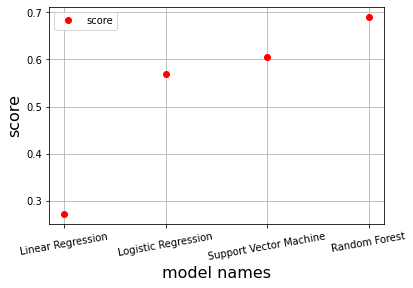

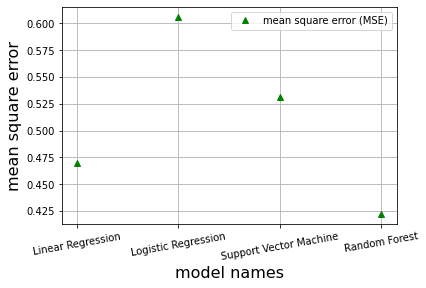

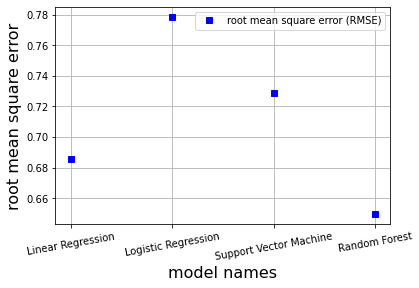

In [ ]:
lst_score = [linear_score, logistic_score, SVM_score, RF_score]
MSE_lst =  [MSE_linear, MSE_logistic, MSE_SVM, MSE_RF]
RMSE_lst =  [RMSE_linear, RMSE_logistic, RMSE_SVM, RMSE_RF]
model_lst = ['Linear Regression', 'Logistic Regression', 'Support Vector Machine', 'Random Forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score', fontsize =16)
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

#6 Feature importance discussion

For logistic regression model

In [ ]:
X_with_corr = X.copy()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
volatile acidity : 0.3217
pH : 0.1554
chlorides : 0.139
Feature 2 : 0.105
Feature 4 : 0.09
total sulfur dioxide : -0.0886
sulphates : -0.0735
alcohol : -0.0725
citric acid : 0.068
free sulfur dioxide : -0.0563
fixed acidity : 0.055
Feature 3 : -0.0388
Feature 1 : 0.0319
residual sugar : 0.025
density : 0.0162


 For RF model

In [ ]:
importances = model_RF.feature_importances_
indices = np.argsort(importances)[::-1]
X_RF = X.copy()

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
alcohol : 0.1123
volatile acidity : 0.0888
sulphates : 0.0866
total sulfur dioxide : 0.0793
Feature 2 : 0.0706
density : 0.0691
Feature 1 : 0.065
chlorides : 0.0624
Feature 3 : 0.0584
Feature 4 : 0.0571
pH : 0.0564
citric acid : 0.0527
free sulfur dioxide : 0.0512
fixed acidity : 0.0478
residual sugar : 0.0422
